In [9]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [10]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimplePie/'

In [11]:
final_df=pd.read_csv('SimplePie_MS_PerStep.csv')

In [12]:
filtered_apples = final_df[final_df['Step'].str.strip() == 'Add apples to pan']
filtered_apples
#C029 is not included

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
1,C002,28,Add apples to pan,435.107928,624.805110,705.801971,563.893022,947.840128,2663.391550,1870.306193,1190.412091
12,C004,30,Add apples to pan,247.174945,293.060332,614.710946,477.332484,745.064010,854.962361,0.000000,585.492297
23,C005,46,Add apples to pan,511.557288,829.818348,1188.353996,910.710785,3034.224119,1608.006156,1072.593997,1183.886136
34,C010,54,Add apples to pan,536.387704,627.323344,805.596982,722.040053,1033.639673,2413.612531,1515.126254,1013.578828
47,C014,32,Add apples to pan,739.680718,1079.493893,3588.904183,1338.030583,2871.806319,3881.368784,2451.963309,1636.366156
58,C015,33,Add apples to pan,846.967873,967.420050,1060.655016,969.086539,1284.899226,2994.697206,1927.376524,1370.348208
69,C018,50,Add apples to pan,475.244808,773.593897,999.382906,784.139287,1401.136589,2920.508881,1489.355663,945.365477
80,C019,40,Add apples to pan,207.500902,330.472059,405.405529,228.189871,1771.425292,110.935285,943.312282,562.875621
91,C022,32,Add apples to pan,975.477951,1390.003537,1377.548578,1309.612258,1469.001324,4089.335793,2405.021218,1837.846669
102,C023,52,Add apples to pan,824.231380,949.448955,1461.064887,1197.437699,1760.440472,2788.476796,1907.344113,1218.902954


In [13]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_apples = filtered_apples.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_apples.select_dtypes(include=['float64', 'int64']).columns
filtered_apples[numerical_cols] = filtered_apples[numerical_cols].replace(0, np.nan)

filtered_apples[numerical_cols] = imputer.fit_transform(filtered_apples[numerical_cols])
filtered_apples

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
1,C002,28.0,Add apples to pan,435.107928,624.805110,705.801971,563.893022,947.840128,2663.391550,1870.306193,1190.412091
12,C004,30.0,Add apples to pan,247.174945,293.060332,614.710946,477.332484,745.064010,854.962361,943.312282,585.492297
23,C005,46.0,Add apples to pan,511.557288,829.818348,1188.353996,910.710785,3034.224119,1608.006156,1072.593997,1183.886136
34,C010,54.0,Add apples to pan,536.387704,627.323344,805.596982,722.040053,1033.639673,2413.612531,1515.126254,1013.578828
47,C014,32.0,Add apples to pan,739.680718,1079.493893,3588.904183,1338.030583,2871.806319,3881.368784,2451.963309,1636.366156
58,C015,33.0,Add apples to pan,846.967873,967.420050,1060.655016,969.086539,1284.899226,2994.697206,1927.376524,1370.348208
69,C018,50.0,Add apples to pan,475.244808,773.593897,999.382906,784.139287,1401.136589,2920.508881,1489.355663,945.365477
80,C019,40.0,Add apples to pan,207.500902,330.472059,405.405529,228.189871,1771.425292,110.935285,943.312282,562.875621
91,C022,32.0,Add apples to pan,975.477951,1390.003537,1377.548578,1309.612258,1469.001324,4089.335793,2405.021218,1837.846669
102,C023,52.0,Add apples to pan,824.231380,949.448955,1461.064887,1197.437699,1760.440472,2788.476796,1907.344113,1218.902954


In [14]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Apples',
    'HeadCamera Distance': 'HeadCamera Distance - Add Apples',
    'LeftElbow Distance': 'LeftElbow Distance - Add Apples',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Apples',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Apples',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Apples',
    'RightElbow Distance': 'RightElbow Distance - Add Apples',
    'RightShoulder Distance': 'RightShoulder Distance - Add Apples'
}

# Rename columns
filtered_apples = filtered_apples.rename(columns=new_column_names)
filtered_apples

,Participant,Block Design Raw Score,Step,Chest Distance - Add Apples,HeadCamera Distance - Add Apples,LeftElbow Distance - Add Apples,LeftShoulder Distance - Add Apples,MotionControllerLeft Distance - Add Apples,MotionControllerRight Distance - Add Apples,RightElbow Distance - Add Apples,RightShoulder Distance - Add Apples
1,C002,28.0,Add apples to pan,435.107928,624.805110,705.801971,563.893022,947.840128,2663.391550,1870.306193,1190.412091
12,C004,30.0,Add apples to pan,247.174945,293.060332,614.710946,477.332484,745.064010,854.962361,943.312282,585.492297
23,C005,46.0,Add apples to pan,511.557288,829.818348,1188.353996,910.710785,3034.224119,1608.006156,1072.593997,1183.886136
34,C010,54.0,Add apples to pan,536.387704,627.323344,805.596982,722.040053,1033.639673,2413.612531,1515.126254,1013.578828
47,C014,32.0,Add apples to pan,739.680718,1079.493893,3588.904183,1338.030583,2871.806319,3881.368784,2451.963309,1636.366156
58,C015,33.0,Add apples to pan,846.967873,967.420050,1060.655016,969.086539,1284.899226,2994.697206,1927.376524,1370.348208
69,C018,50.0,Add apples to pan,475.244808,773.593897,999.382906,784.139287,1401.136589,2920.508881,1489.355663,945.365477
80,C019,40.0,Add apples to pan,207.500902,330.472059,405.405529,228.189871,1771.425292,110.935285,943.312282,562.875621
91,C022,32.0,Add apples to pan,975.477951,1390.003537,1377.548578,1309.612258,1469.001324,4089.335793,2405.021218,1837.846669
102,C023,52.0,Add apples to pan,824.231380,949.448955,1461.064887,1197.437699,1760.440472,2788.476796,1907.344113,1218.902954


In [15]:
tracker_columns = ['Chest Distance - Add Apples', 'HeadCamera Distance - Add Apples', 'LeftElbow Distance - Add Apples', 'LeftShoulder Distance - Add Apples',
                   'RightElbow Distance - Add Apples', 'RightShoulder Distance - Add Apples', 'MotionControllerLeft Distance - Add Apples',
                   'MotionControllerRight Distance - Add Apples']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_apples, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_apples[block_design_col], filtered_apples[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_apples, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Apples,-0.083885,0.775561
1,HeadCamera Distance - Add Apples,-0.149780,0.609299
2,LeftElbow Distance - Add Apples,0.015419,0.958278
3,LeftShoulder Distance - Add Apples,-0.006608,0.982113
4,RightElbow Distance - Add Apples,-0.233738,0.421246
5,RightShoulder Distance - Add Apples,-0.257710,0.373722
6,MotionControllerLeft Distance - Add Apples,0.110132,0.707808
7,MotionControllerRight Distance - Add Apples,0.013216,0.964235


In [16]:
#filtered_apples.to_csv('SimplePie_AddApples.csv',index=False)

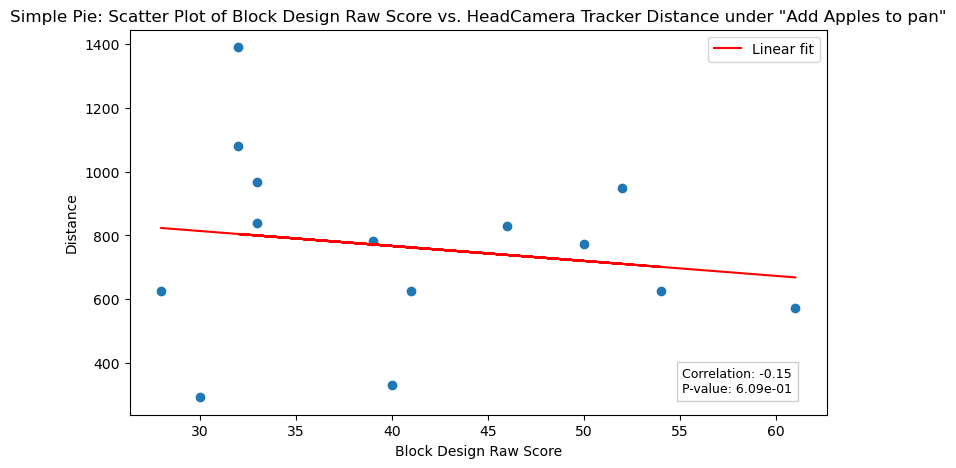

In [17]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['HeadCamera Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['HeadCamera Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['HeadCamera Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '25 SP_ApplesDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

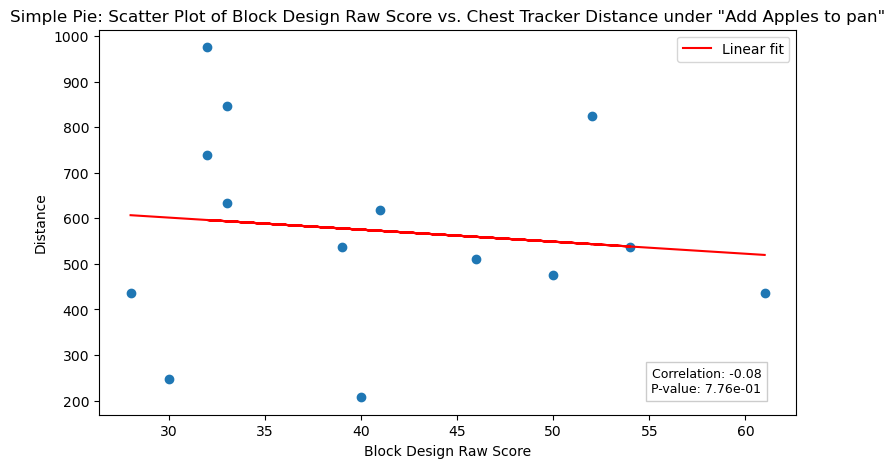

In [18]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['Chest Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['Chest Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['Chest Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '26 SP_ApplesDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

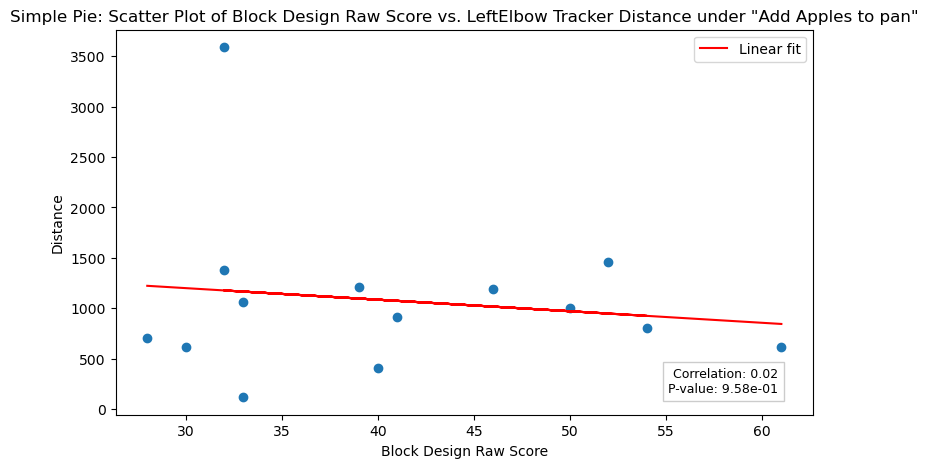

In [19]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['LeftElbow Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['LeftElbow Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['LeftElbow Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '27 SP_ApplesDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

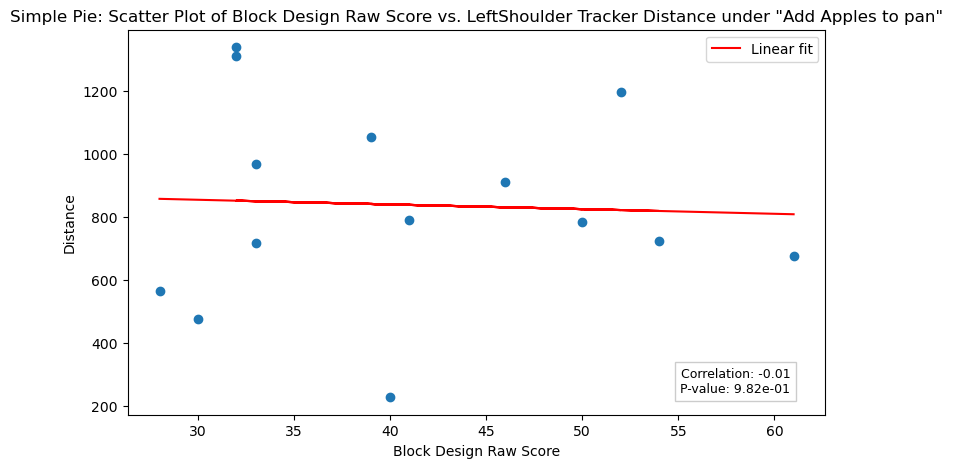

In [20]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['LeftShoulder Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['LeftShoulder Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['LeftShoulder Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '28 SP_ApplesDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

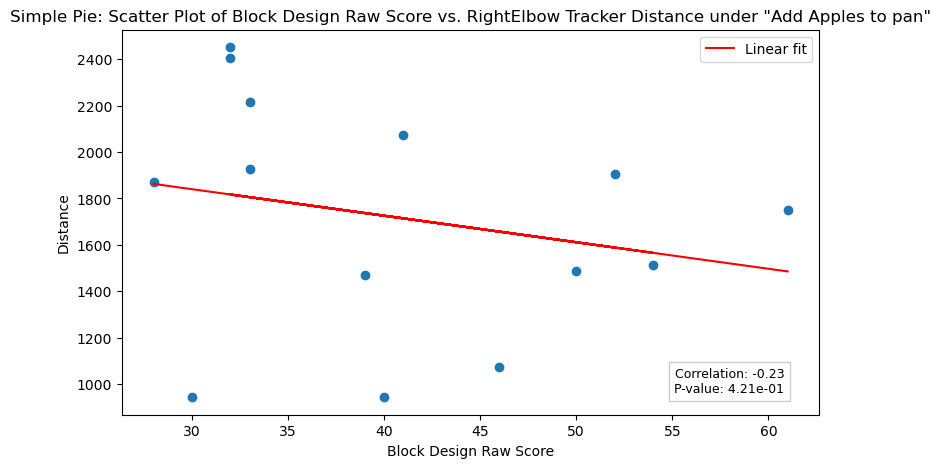

In [21]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['RightElbow Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['RightElbow Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['RightElbow Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '29 SP_ApplesDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

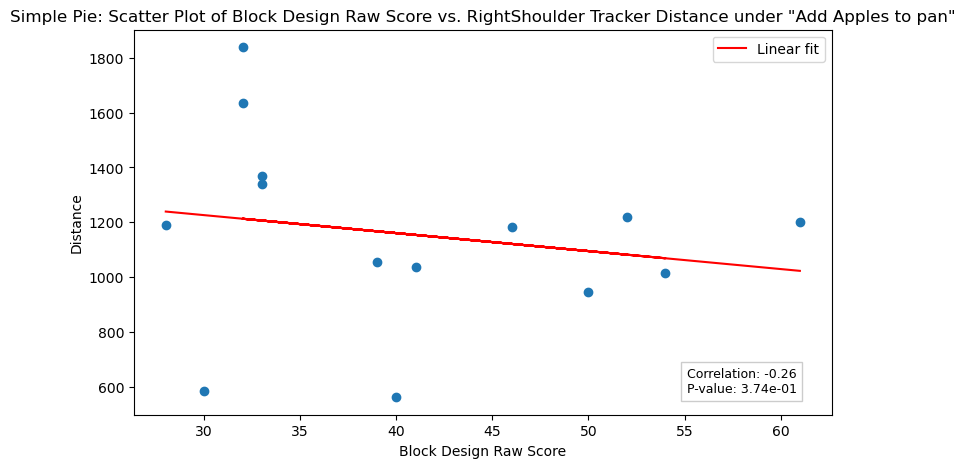

In [22]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['RightShoulder Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['RightShoulder Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['RightShoulder Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '30 SP_ApplesDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

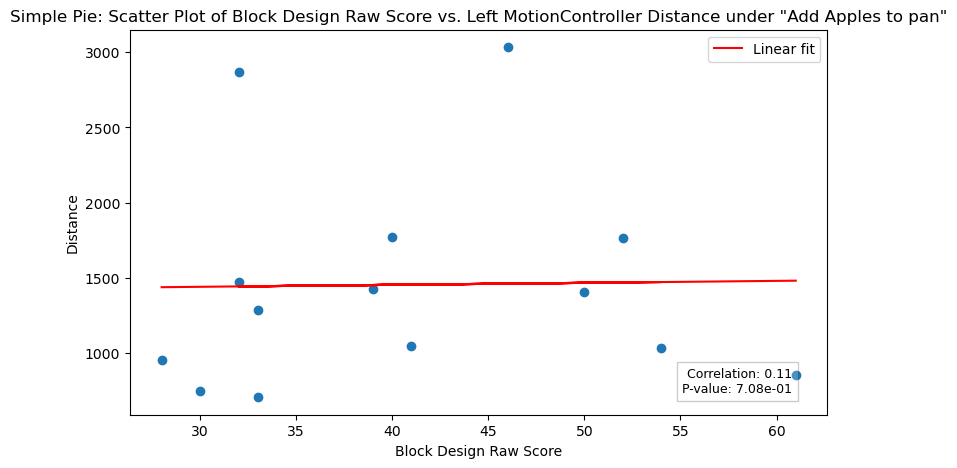

In [23]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerLeft Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerLeft Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerLeft Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '31 SP_ApplesDistanceLeftMotionContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

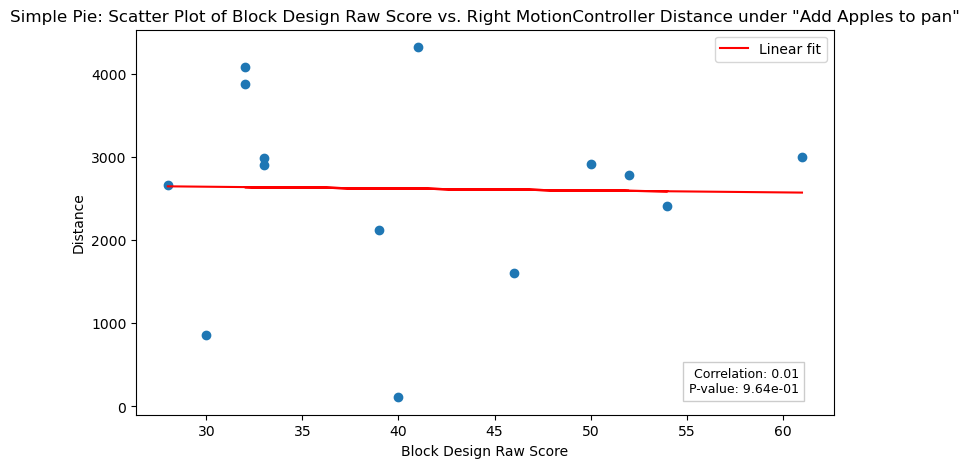

In [24]:
correlation, p_value = spearmanr(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerRight Distance - Add Apples'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerRight Distance - Add Apples'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_apples['Block Design Raw Score'], filtered_apples['MotionControllerRight Distance - Add Apples'], 1)
fit_line = slope * filtered_apples['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_apples['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Apples to pan"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '32 SP_ApplesDistanceRightMotionContrl.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()